In [1]:
import ROOT as r
import math
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
r.gStyle.SetOptStat(0)
r.gStyle.SetOptFit(1111)
import matplotlib.pyplot as plt
import csv
import pandas

import seaborn as sns
sns.set(style="ticks", color_codes=True)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib 
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

from scipy import stats

%matplotlib inline

np.random.seed(12345678)  #fix random seed to get the same result

Welcome to JupyROOT 6.12/06


Lets test the statistical compatability of the x-distributions of our histograms. In order to do this, we first need to import the file.

In [2]:
f = r.TFile("./data/Calo2Projections.root")
f.cd()
f.ls()

def GetKeyNames( self, dir = "" ):
        self.cd(dir)
        return [key.GetName() for key in r.gDirectory.GetListOfKeys()]
r.TFile.GetKeyNames = GetKeyNames

keyList = f.GetKeyNames("")
print ("\nKeys in file:", keyList)
#h = r.TH3D()
#f.GetObject(keyList[1], h)


Keys in file: ['h1', 'h2', 'h3', 'h4', 'h5', 'h6', 'h7', 'h8', 'h9', 'h10', 'h11', 'h12', 'h13', 'h14', 'h15', 'h16', 'h17', 'h18', 'h19', 'h20', 'h21', 'h22', 'h23', 'h24']
TFile**		./data/Calo2Projections.root	
 TFile*		./data/Calo2Projections.root	
  KEY: TH3D	h1;1	h1
  KEY: TH3D	h2;1	h2
  KEY: TH3D	h3;1	h3
  KEY: TH3D	h4;1	h4
  KEY: TH3D	h5;1	h5
  KEY: TH3D	h6;1	h6
  KEY: TH3D	h7;1	h7
  KEY: TH3D	h8;1	h8
  KEY: TH3D	h9;1	h9
  KEY: TH3D	h10;1	h10
  KEY: TH3D	h11;1	h11
  KEY: TH3D	h12;1	h12
  KEY: TH3D	h13;1	h13
  KEY: TH3D	h14;1	h14
  KEY: TH3D	h15;1	h15
  KEY: TH3D	h16;1	h16
  KEY: TH3D	h17;1	h17
  KEY: TH3D	h18;1	h18
  KEY: TH3D	h19;1	h19
  KEY: TH3D	h20;1	h20
  KEY: TH3D	h21;1	h21
  KEY: TH3D	h22;1	h22
  KEY: TH3D	h23;1	h23
  KEY: TH3D	h24;1	h24


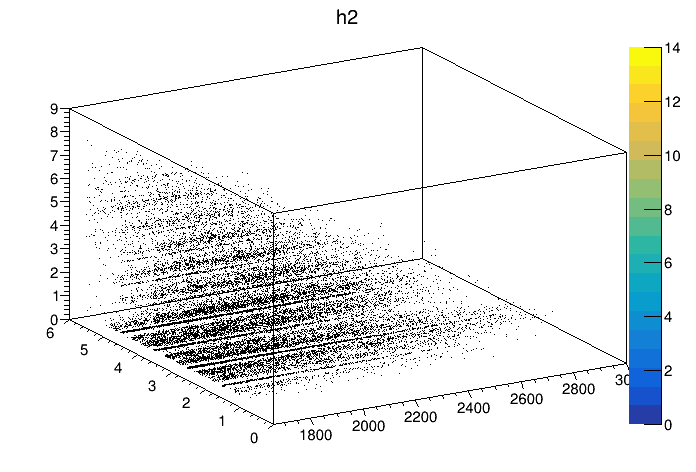

In [4]:
h = r.TH3D()
f.GetObject(keyList[1], h)
c = r.TCanvas()
h.Draw("colz")
c.Draw()

In [5]:
# https://github.com/syrte/ndtest/blob/master/ndtest.py

In [6]:
from __future__ import division
import numpy as np
from numpy import random
from scipy.spatial.distance import pdist, cdist
from scipy.stats import kstwobign, pearsonr
from scipy.stats import genextreme

__all__ = ['ks2d2s', 'estat', 'estat2d']


def ks2d2s(x1, y1, x2, y2, nboot=None, extra=False):
    '''
    Two-dimensional Kolmogorov-Smirnov test on two samples. 
    Parameters
    ----------
    x1, y1 : ndarray, shape (n1, )
        Data of sample 1.
    x2, y2 : ndarray, shape (n2, )
        Data of sample 2. Size of two samples can be different.
    extra: bool, optional
        If True, KS statistic is also returned. Default is False.

    Returns
    -------
    p : float
        Two-tailed p-value.
    D : float, optional
        KS statistic. Returned if keyword `extra` is True.

    Notes
    -----
    This is the two-sided K-S test. Small p-values means that the two samples are significantly different. Note that the p-value is only an approximation as the analytic distribution is unkonwn. The approximation is accurate enough when N > ~20 and p-value < ~0.20 or so. When p-value > 0.20, the value may not be accurate, but it certainly implies that the two samples are not significantly different. (cf. Press 2007)

    References
    ----------
    Peacock, J.A. 1983, Two-Dimensional Goodness-of-Fit Testing in Astronomy, Monthly Notices of the Royal Astronomical Society, vol. 202, pp. 615-627
    Fasano, G. and Franceschini, A. 1987, A Multidimensional Version of the Kolmogorov-Smirnov Test, Monthly Notices of the Royal Astronomical Society, vol. 225, pp. 155-170
    Press, W.H. et al. 2007, Numerical Recipes, section 14.8
    '''

    assert (len(x1) == len(y1)) and (len(x2) == len(y2))
    n1, n2 = len(x1), len(x2)
    D = avgmaxdist(x1, y1, x2, y2)

    if nboot is None:
        sqen = np.sqrt(n1 * n2 / (n1 + n2))
        r1 = pearsonr(x1, y1)[0]
        r2 = pearsonr(x2, y2)[0]
        r = np.sqrt(1 - 0.5 * (r1**2 + r2**2))
        d = D * sqen / (1 + r * (0.25 - 0.75 / sqen))
        p = kstwobign.sf(d)
    else:
        n = n1 + n2
        x = np.concatenate([x1, x2])
        y = np.concatenate([y1, y2])
        d = np.empty(nboot, 'f')
        for i in range(nboot):
            idx = random.choice(n, n, replace=True)
            ix1, ix2 = idx[:n1], idx[n1:]
            #ix1 = random.choice(n, n1, replace=True)
            #ix2 = random.choice(n, n2, replace=True)
            d[i] = avgmaxdist(x[ix1], y[ix1], x[ix2], y[ix2])
        p = np.sum(d > D).astype('f') / nboot
    if extra:
        return p, D
    else:
        return p


def avgmaxdist(x1, y1, x2, y2):
    D1 = maxdist(x1, y1, x2, y2)
    D2 = maxdist(x2, y2, x1, y1)
    return (D1 + D2) / 2


def maxdist(x1, y1, x2, y2):
    n1 = len(x1)
    D1 = np.empty((n1, 4))
    for i in range(n1):
        a1, b1, c1, d1 = quadct(x1[i], y1[i], x1, y1)
        a2, b2, c2, d2 = quadct(x1[i], y1[i], x2, y2)
        D1[i] = [a1 - a2, b1 - b2, c1 - c2, d1 - d2]

    # re-assign the point to maximize difference,
    # the discrepancy is significant for N < ~50
    D1[:, 0] -= 1 / n1

    dmin, dmax = -D1.min(), D1.max() + 1 / n1
    return max(dmin, dmax)


def quadct(x, y, xx, yy):
    n = len(xx)
    ix1, ix2 = xx <= x, yy <= y
    a = np.sum(ix1 & ix2) / n
    b = np.sum(ix1 & ~ix2) / n
    c = np.sum(~ix1 & ix2) / n
    d = 1 - a - b - c
    return a, b, c, d


def estat2d(x1, y1, x2, y2, **kwds):
    return estat(np.c_[x1, y1], np.c_[x2, y2], **kwds)


def estat(x, y, nboot=1000, replace=False, method='log', fitting=False):
    '''
    Energy distance statistics test.
    Reference
    ---------
    Aslan, B, Zech, G (2005) Statistical energy as a tool for binning-free
      multivariate goodness-of-fit tests, two-sample comparison and unfolding.
      Nuc Instr and Meth in Phys Res A 537: 626-636
    Szekely, G, Rizzo, M (2014) Energy statistics: A class of statistics
      based on distances. J Stat Planning & Infer 143: 1249-1272
    Brian Lau, multdist, https://github.com/brian-lau/multdist

    '''
    n, N = len(x), len(x) + len(y)
    stack = np.vstack([x, y])
    stack = (stack - stack.mean(0)) / stack.std(0)
    if replace:
        rand = lambda x: random.randint(x, size=x)
    else:
        rand = random.permutation

    en = energy(stack[:n], stack[n:], method)
    en_boot = np.zeros(nboot, 'f')
    for i in range(nboot):
        idx = rand(N)
        en_boot[i] = energy(stack[idx[:n]], stack[idx[n:]], method)

    if fitting:
        param = genextreme.fit(en_boot)
        p = genextreme.sf(en, *param)
        return p, en, param
    else:
        p = (en_boot >= en).sum() / nboot
        return p, en, en_boot


def energy(x, y, method='log'):
    dx, dy, dxy = pdist(x), pdist(y), cdist(x, y)
    n, m = len(x), len(y)
    if method == 'log':
        dx, dy, dxy = np.log(dx), np.log(dy), np.log(dxy)
    elif method == 'gaussian':
        raise NotImplementedError
    elif method == 'linear':
        pass
    else:
        raise ValueError
    z = dxy.sum() / (n * m) - dx.sum() / n**2 - dy.sum() / m**2
    # z = ((n*m)/(n+m)) * z # ref. SR
    return z

In [7]:
x1 = np.array([1,1,1,1])
x2 = np.array([2,1,2,1])
y1 = np.array([1,1,1,1])
y2 = np.array([2,1,2,2])

print(x1)
print(ks2d2s(x1,y1,x2,y2,1000,True))

[1 1 1 1]
(0.008, 0.875)


In [8]:
h2 = r.TH3D()
f.GetObject(keyList[1], h2)

In [9]:
h8 = r.TH3D()
f.GetObject(keyList[8-1], h8)
h20 = r.TH3D()
f.GetObject(keyList[20-1], h20)

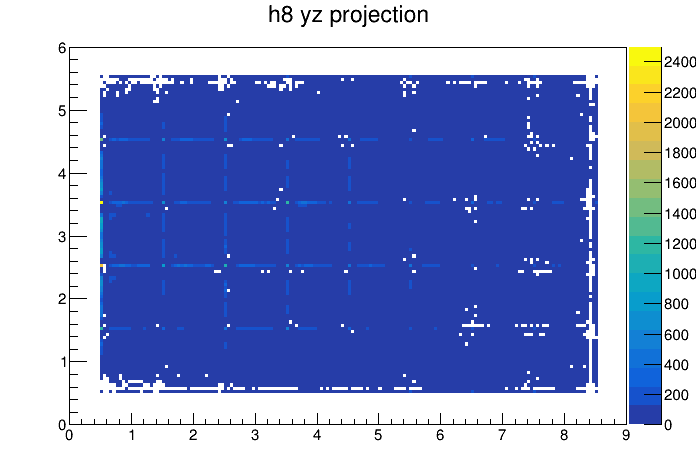

In [10]:
hproj2 = h8.Project3D("yz")
hproj2.Draw("colz")
c.Draw()

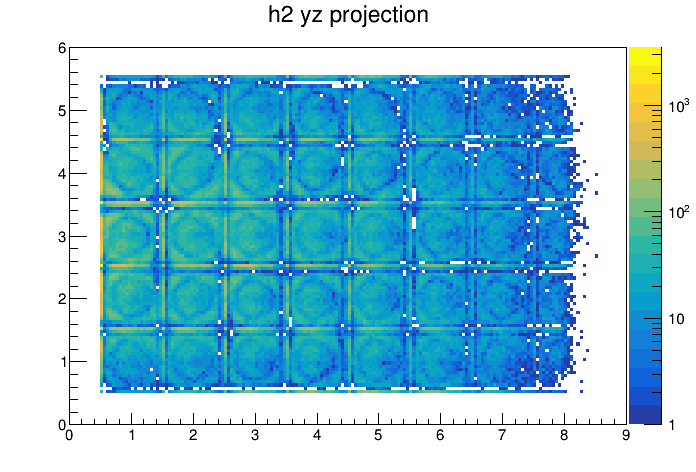

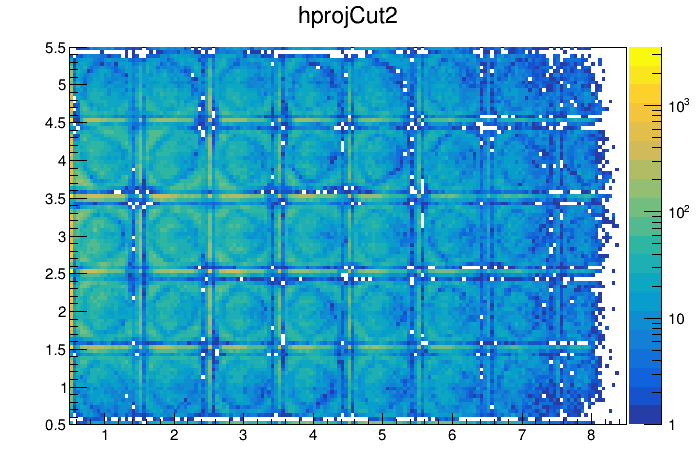

In [11]:
hproj = h2.Project3D("yz")
c = r.TCanvas()
c.SetLogz()
hproj.Draw("colz")

hprojCut2 = r.TH2F("hprojCut2","hprojCut2",hproj.GetXaxis().FindBin(8.5) - hproj.GetXaxis().FindBin(0.5),0.5,8.5,
                   hproj.GetYaxis().FindBin(5.5) - hproj.GetYaxis().FindBin(0.5), 0.5,5.5)

for i in range(hproj.GetXaxis().FindBin(0.5), hproj.GetXaxis().FindBin(8.5)):
    for j in range(hproj.GetYaxis().FindBin(0.5),hproj.GetYaxis().FindBin(5.5)):
        binContent = hproj.GetBinContent(i,j)
        newBin = hprojCut2.GetBin(i-hproj.GetXaxis().FindBin(0.5)+1, j-hproj.GetYaxis().FindBin(0.5)+1)
        hprojCut2.SetBinContent(newBin,binContent)
#        print(i,j,newBin,binContent)

c.Draw()

c2 = r.TCanvas()
c2.SetLogz()
hprojCut2.Draw("colz")
c2.Draw()

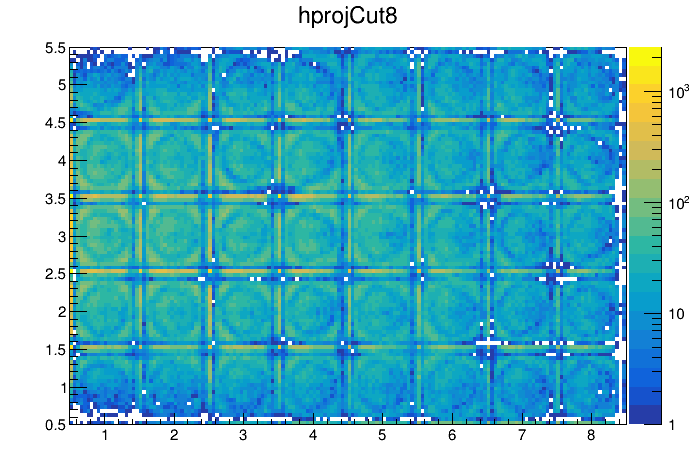

In [12]:
hproj = h8.Project3D("yz")

hprojCut8 = r.TH2F("hprojCut8","hprojCut8",hproj.GetXaxis().FindBin(8.5) - hproj.GetXaxis().FindBin(0.5),0.5,8.5,
                   hproj.GetYaxis().FindBin(5.5) - hproj.GetYaxis().FindBin(0.5), 0.5,5.5)

for i in range(hproj.GetXaxis().FindBin(0.5), hproj.GetXaxis().FindBin(8.5)):
    for j in range(hproj.GetYaxis().FindBin(0.5),hproj.GetYaxis().FindBin(5.5)):
        binContent = hproj.GetBinContent(i,j)
        newBin = hprojCut8.GetBin(i-hproj.GetXaxis().FindBin(0.5)+1, j-hproj.GetYaxis().FindBin(0.5)+1)
        hprojCut8.SetBinContent(newBin,binContent)
#        print(i,j,newBin,binContent)

c2 = r.TCanvas()
c2.SetLogz()
hprojCut8.Draw("colz")
c2.Draw()

In [13]:
print(hprojCut2.KolmogorovTest(hprojCut2,"D"))

1.0
 Kolmo Prob  h1 = hprojCut2, sum1=365179
 Kolmo Prob  h2 = hprojCut2, sum2=365179
 Kolmo Probabil = 1.000000, Max Dist = 0


Starting Calo: 1 (histogram  h1 )
Starting Calo: 2 (histogram  h2 )
Starting Calo: 3 (histogram  h3 )
Starting Calo: 4 (histogram  h4 )
Starting Calo: 5 (histogram  h5 )


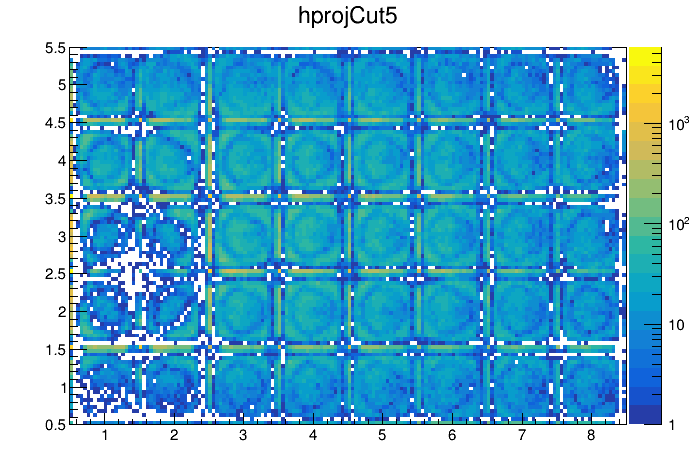

In [11]:
hProjCutVec = []

for k in range(5):
    print("Starting Calo:", k+1, "(histogram ", keyList[k],")")
    hk = r.TH3D()
    f.GetObject(keyList[k], hk)
    hproj = hk.Project3D("yz")

    hprojCutk = r.TH2F("hprojCut"+str(k+1),"hprojCut"+str(k+1),
                       hproj.GetXaxis().FindBin(8.5) - hproj.GetXaxis().FindBin(0.5),0.5,8.5,
                       hproj.GetYaxis().FindBin(5.5) - hproj.GetYaxis().FindBin(0.5), 0.5,5.5)

    for i in range(hproj.GetXaxis().FindBin(0.5), hproj.GetXaxis().FindBin(8.5)):
        for j in range(hproj.GetYaxis().FindBin(0.5),hproj.GetYaxis().FindBin(5.5)):
            binContent = hproj.GetBinContent(i,j)
            newBin = hprojCutk.GetBin(i-hproj.GetXaxis().FindBin(0.5)+1, j-hproj.GetYaxis().FindBin(0.5)+1)
            hprojCutk.SetBinContent(newBin,binContent)
    #        print(i,j,newBin,binContent)

    c2 = r.TCanvas()
    c2.SetLogz()
    hprojCutk.Draw("colz")
    hProjCutVec.append(hprojCutk.Clone("hprojCut"+str(k+1)))
    c2.Draw()

Starting Calo: 6 (histogram  h6 )
Starting Calo: 7 (histogram  h7 )
Starting Calo: 8 (histogram  h8 )
Starting Calo: 9 (histogram  h9 )
Starting Calo: 10 (histogram  h10 )
Starting Calo: 11 (histogram  h11 )


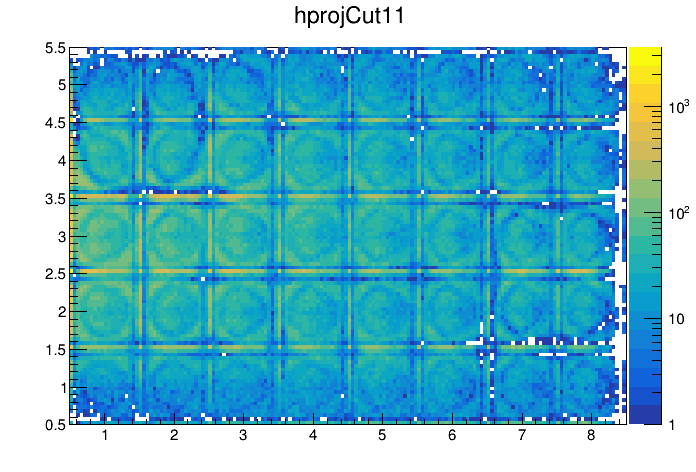

In [12]:
for k in range(5,11):
    print("Starting Calo:", k+1, "(histogram ", keyList[k],")")
    hk = r.TH3D()
    f.GetObject(keyList[k], hk)
    hproj = hk.Project3D("yz")

    hprojCutk = r.TH2F("hprojCut"+str(k+1),"hprojCut"+str(k+1),
                       hproj.GetXaxis().FindBin(8.5) - hproj.GetXaxis().FindBin(0.5),0.5,8.5,
                       hproj.GetYaxis().FindBin(5.5) - hproj.GetYaxis().FindBin(0.5), 0.5,5.5)

    for i in range(hproj.GetXaxis().FindBin(0.5), hproj.GetXaxis().FindBin(8.5)):
        for j in range(hproj.GetYaxis().FindBin(0.5),hproj.GetYaxis().FindBin(5.5)):
            binContent = hproj.GetBinContent(i,j)
            newBin = hprojCutk.GetBin(i-hproj.GetXaxis().FindBin(0.5)+1, j-hproj.GetYaxis().FindBin(0.5)+1)
            hprojCutk.SetBinContent(newBin,binContent)
    #        print(i,j,newBin,binContent)

    c2 = r.TCanvas()
    c2.SetLogz()
    hprojCutk.Draw("colz")
    hProjCutVec.append(hprojCutk.Clone("hprojCut"+str(k+1)))
    c2.Draw()

Starting Calo: 12 (histogram  h12 )
Starting Calo: 13 (histogram  h13 )
Starting Calo: 14 (histogram  h14 )
Starting Calo: 15 (histogram  h15 )
Starting Calo: 16 (histogram  h16 )
Starting Calo: 17 (histogram  h17 )


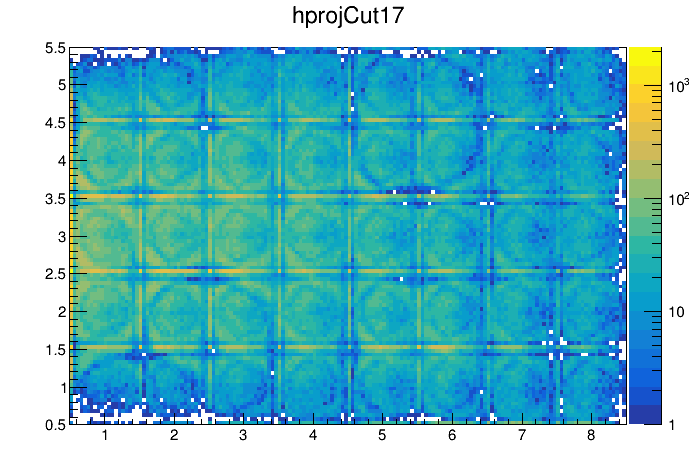

In [13]:
for k in range(11,17):
    print("Starting Calo:", k+1, "(histogram ", keyList[k],")")
    hk = r.TH3D()
    f.GetObject(keyList[k], hk)
    hproj = hk.Project3D("yz")

    hprojCutk = r.TH2F("hprojCut"+str(k+1),"hprojCut"+str(k+1),
                       hproj.GetXaxis().FindBin(8.5) - hproj.GetXaxis().FindBin(0.5),0.5,8.5,
                       hproj.GetYaxis().FindBin(5.5) - hproj.GetYaxis().FindBin(0.5), 0.5,5.5)

    for i in range(hproj.GetXaxis().FindBin(0.5), hproj.GetXaxis().FindBin(8.5)):
        for j in range(hproj.GetYaxis().FindBin(0.5),hproj.GetYaxis().FindBin(5.5)):
            binContent = hproj.GetBinContent(i,j)
            newBin = hprojCutk.GetBin(i-hproj.GetXaxis().FindBin(0.5)+1, j-hproj.GetYaxis().FindBin(0.5)+1)
            hprojCutk.SetBinContent(newBin,binContent)
    #        print(i,j,newBin,binContent)

    c2 = r.TCanvas()
    c2.SetLogz()
    hprojCutk.Draw("colz")
    hProjCutVec.append(hprojCutk.Clone("hprojCut"+str(k+1)))
    c2.Draw()

Starting Calo: 18 (histogram  h18 )
Starting Calo: 19 (histogram  h19 )
Starting Calo: 20 (histogram  h20 )
Starting Calo: 21 (histogram  h21 )
Starting Calo: 22 (histogram  h22 )
Starting Calo: 23 (histogram  h23 )


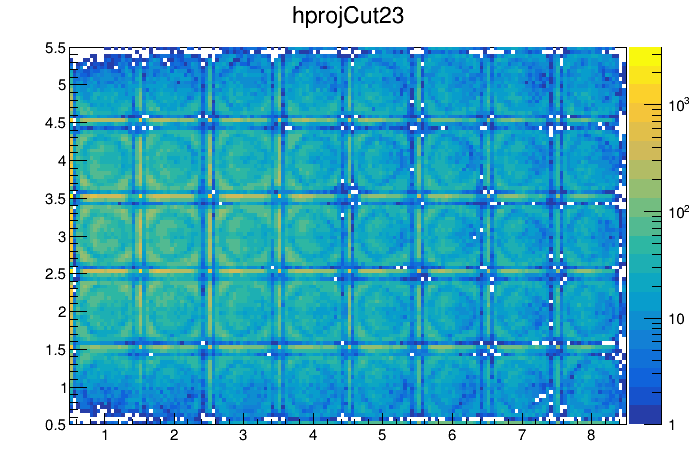

In [14]:
for k in range(17,24):
    print("Starting Calo:", k+1, "(histogram ", keyList[k],")")
    hk = r.TH3D()
    f.GetObject(keyList[k], hk)
    hproj = hk.Project3D("yz")

    hprojCutk = r.TH2F("hprojCut"+str(k+1),"hprojCut"+str(k+1),
                       hproj.GetXaxis().FindBin(8.5) - hproj.GetXaxis().FindBin(0.5),0.5,8.5,
                       hproj.GetYaxis().FindBin(5.5) - hproj.GetYaxis().FindBin(0.5), 0.5,5.5)

    for i in range(hproj.GetXaxis().FindBin(0.5), hproj.GetXaxis().FindBin(8.5)):
        for j in range(hproj.GetYaxis().FindBin(0.5),hproj.GetYaxis().FindBin(5.5)):
            binContent = hproj.GetBinContent(i,j)
            newBin = hprojCutk.GetBin(i-hproj.GetXaxis().FindBin(0.5)+1, j-hproj.GetYaxis().FindBin(0.5)+1)
            hprojCutk.SetBinContent(newBin,binContent)
    #        print(i,j,newBin,binContent)

    c2 = r.TCanvas()
    c2.SetLogz()
    hprojCutk.Draw("colz")
    hProjCutVec.append(hprojCutk.Clone("hprojCut"+str(k+1)))
    c2.Draw()

In [16]:
print(hProjCutVec)

[<ROOT.TH2F object ("hprojCut1") at 0x7fffe9de1300>, <ROOT.TH2F object ("hprojCut2") at 0x7fffe9b8a200>, <ROOT.TH2F object ("hprojCut3") at 0x7fffe9bac270>, <ROOT.TH2F object ("hprojCut4") at 0x7fffe9ebb5a0>, <ROOT.TH2F object ("hprojCut5") at 0x7fffe9ebb190>, <ROOT.TH2F object ("hprojCut6") at 0x7fffe9ddd630>, <ROOT.TH2F object ("hprojCut7") at 0x7fffe9eb62e0>, <ROOT.TH2F object ("hprojCut8") at 0x7fffe9ed24e0>, <ROOT.TH2F object ("hprojCut9") at 0x7fffe9ed2d20>, <ROOT.TH2F object ("hprojCut10") at 0x7fffe9ddf5b0>, <ROOT.TH2F object ("hprojCut11") at 0x7fffe9ddfdf0>, <ROOT.TH2F object ("hprojCut12") at 0x7fffe9ea7910>, <ROOT.TH2F object ("hprojCut13") at 0x7fffe96de0b0>, <ROOT.TH2F object ("hprojCut14") at 0x7fffe9e9ad60>, <ROOT.TH2F object ("hprojCut15") at 0x7fffe9e9bde0>, <ROOT.TH2F object ("hprojCut16") at 0x7fffe9eb7bd0>, <ROOT.TH2F object ("hprojCut17") at 0x7fffe9ea50a0>, <ROOT.TH2F object ("hprojCut18") at 0x7fffe9eb3c90>, <ROOT.TH2F object ("hprojCut19") at 0x7fffe96dac40>, <

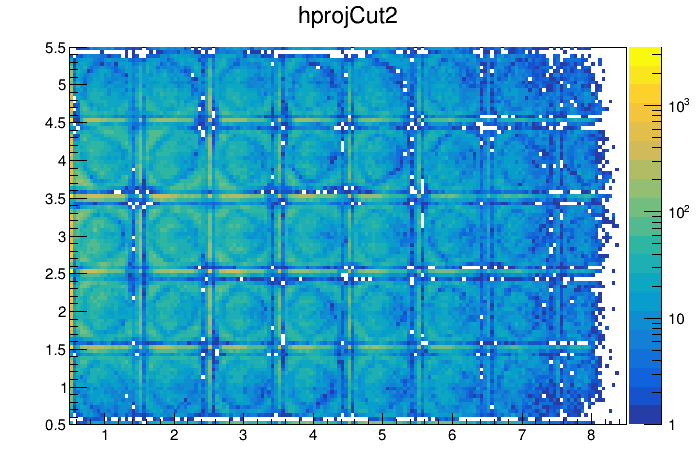

In [17]:
hProjCutVec[1].Draw("colz")
c2.Draw()

In [44]:
KStestVec = []

for i, caloi in enumerate(hProjCutVec):
    for j, caloj in enumerate(hProjCutVec):
        if i <=  j:
            ding = caloj.KolmogorovTest(caloi,"") 
            #print(hProjCutVec[2-1].KolmogorovTest(caloi,"D"), hProjCutVec[2-1].Chi2Test(caloi,"P"))
            KStestVec.append((i+1,j+1,ding))

In [45]:
print(KStestVec)

[(1, 1, 1.0), (1, 2, 0.0), (1, 3, 0.0), (1, 4, 0.0), (1, 5, 0.0), (1, 6, 0.0), (1, 7, 0.0), (1, 8, 0.0), (1, 9, 0.0), (1, 10, 0.0), (1, 11, 0.0), (1, 12, 0.0), (1, 13, 0.0), (1, 14, 0.0), (1, 15, 0.0), (1, 16, 0.0), (1, 17, 0.0), (1, 18, 0.0), (1, 19, 0.0), (1, 20, 0.0), (1, 21, 0.0), (1, 22, 0.0), (1, 23, 0.0), (1, 24, 0.0), (2, 2, 1.0), (2, 3, 0.0), (2, 4, 0.0), (2, 5, 0.0), (2, 6, 0.0), (2, 7, 0.0), (2, 8, 0.0), (2, 9, 0.0), (2, 10, 0.0), (2, 11, 0.0), (2, 12, 0.0), (2, 13, 0.0), (2, 14, 0.0), (2, 15, 0.0), (2, 16, 0.0), (2, 17, 0.0), (2, 18, 0.0), (2, 19, 0.0), (2, 20, 0.0), (2, 21, 0.0), (2, 22, 0.0), (2, 23, 0.0), (2, 24, 0.0), (3, 3, 1.0), (3, 4, 0.0), (3, 5, 0.0), (3, 6, 0.0), (3, 7, 0.0), (3, 8, 2.997669802655624e-37), (3, 9, 0.0), (3, 10, 0.0), (3, 11, 0.0), (3, 12, 0.0), (3, 13, 0.0), (3, 14, 0.0), (3, 15, 0.0), (3, 16, 0.0), (3, 17, 0.0), (3, 18, 0.0), (3, 19, 0.0), (3, 20, 0.0), (3, 21, 0.0), (3, 22, 0.0), (3, 23, 0.0), (3, 24, 0.0), (4, 4, 1.0), (4, 5, 0.0), (4, 6, 0.0), 

1 1 1.0
2 2 1.0
3 3 1.0
3 8 2.997669802655624e-37
4 4 1.0
4 10 1.4117670388802282e-40
4 21 4.826806017003222e-31
5 5 1.0
6 6 1.0
7 7 1.0
8 8 1.0
8 10 3.9940682223144354e-29
9 9 1.0
10 10 1.0
10 15 7.937172727565073e-24
11 11 1.0
12 12 1.0
12 14 1.5240311603873285e-38
13 13 1.0
14 14 1.0
14 15 4.3551351454604495e-23
15 15 1.0
15 20 3.8782475676089984e-37
16 16 1.0
17 17 1.0
18 18 1.0
19 19 1.0
20 20 1.0
21 21 1.0
22 22 1.0
23 23 1.0
24 24 1.0


Warning in <TFile::Append>: Replacing existing TH1: Kolmogorov-Smirnov Comparison of Calorimeters (Potential memory leak).


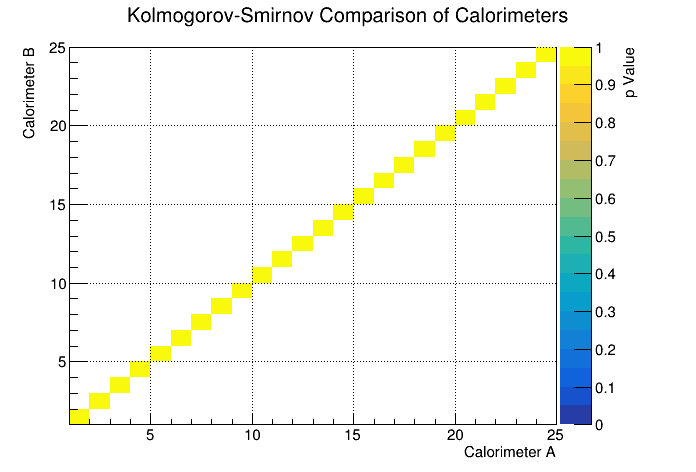

In [46]:
#hist2d.Delete()
hist2d = r.TH2D('Kolmogorov-Smirnov Comparison of Calorimeters','hist2d',24,1,25,24,1,25)
for calo1, calo2, p in KStestVec:
    hist2d.Fill(calo1,calo2,p)
    if p>0:
        print(calo1,calo2,p)
hist2d.SetTitle("Kolmogorov-Smirnov Comparison of Calorimeters")
hist2d.GetXaxis().SetTitle("Calorimeter A")
hist2d.GetYaxis().SetTitle("Calorimeter B")
hist2d.GetZaxis().SetTitle("p Value")
c = r.TCanvas()
hist2d.Draw("COLZ")
#c.SetLogz()
hist2d.GetZaxis().SetRangeUser(0.0000001,1)
c.SetGridx()
c.SetGridy()
c.SetRightMargin(0.2)
c.Draw()